In [1]:
import numpy as np
import qiML
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
####
#### qiSVD

# parameters ----------
k = 500  # The number of components
p = 600  # The number of iterations for tree-sampling
# parameters ----------

M = 5000 # The number of samples
N = 5000 # The number of features
rank = 100

# Prepare input matrix A
A1 = np.random.randn(M, rank)
A2 = np.random.randn(rank, N)
A = np.dot(A1, A2)

# Perform qiSVD on A:  A is (M x N)
# normalizeData : defalt is 'False'
U, s, Vh = qiML.qiSVD(A, k, p, normalizeData=True)

SVD ppMt
Orthomalization


Get fitResult ...
Performing qiSVD on X
SVD ppMt
Orthomalization
Performing qiSVD on Y
SVD ppMt
Orthomalization
Get x_scores and y_scores ...
Performing qiSVD on X
SVD ppMt
Orthomalization
Performing qiSVD on Y
SVD ppMt
Orthomalization


Text(0.5, 1.0, 'Fitting results of CCA: rank=10')

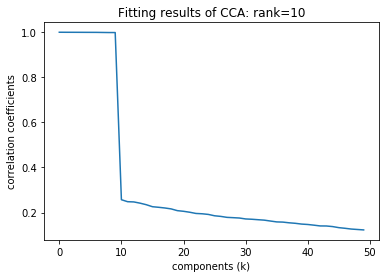

In [7]:
####
#### qiCCA

# parameters ----------
k = 50  # The number of components
p = 120  # The number of iterations for tree-sampling
noise_coef = 0.5
# parameters ----------

M = 5000 # The number of samples
Nx = 5000 # The number of features for X
Ny = 3000 # The number of features for Y
rank = 10

# Prepare a pair of input data X, Y
Z = np.random.randn(M, rank)
Zx  = np.random.randn(rank, Nx)
Zy  = np.random.randn(rank, Ny)
X = np.dot(Z, Zx) + noise_coef* np.random.randn(M, Nx)
Y = np.dot(Z, Zy) + noise_coef* np.random.randn(M, Ny)

# Perform qiCCA on X, Y
# normalizeData : defalt is 'False'
print('Get fitResult ...')
fitResult = qiML.qiCCA(k_x=100, k_y=100, k=k, p=p, normalizeData=True).fit(X, Y)
print('Get x_scores and y_scores ...')
x_scores, y_scores = qiML.qiCCA(k_x=100, k_y=100, k=k, p=p, normalizeData=True).fit_transform(X, Y)

# To obtain scores for newX and newY , run the following command
# new_x_scores, new_y_scores = qiML.qiCCA(k_x=100, k_y=100, k=k, p=p, normalizeData=True).fit(X, Y).transform(newX, newY)

# figure
plt.figure()
plt.plot(fitResult.corrcoefs)
plt.ylabel('correlation coefficients')
plt.xlabel('components (k)')
plt.title('Fitting results of CCA: rank={:d}'.format(rank))
# plt.show()